### Hito4 para Determinantes del ingreso
*"Modelación donde se implementará una solución analítica que aumente las métricas de desempeño. Se solicitan por lo menos 3 modelos predictivos, donde deberán reportar las principales métricas. Cada modelo predictivo debe tener una reseña sobre el por qué se diseñó de esa forma.."*

####  Carga de librerias e importación de .csv obtenido en el hito anterior

In [50]:
%matplotlib inline

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import roc_curve, classification_report 

#from graficos import *
import funciones as fun
from graficos import *

import warnings
warnings.filterwarnings('ignore')

plt.style.use('seaborn') # Gráficos estilo seaborn
plt.rcParams["figure.figsize"] = (8,6) # Tamaño gráficos (5, 3)
plt.rcParams["figure.dpi"] = 75 # resolución gráficos 100

In [51]:
df = pd.read_csv('income_mod.csv')
print(df.shape)
df.head()

(46033, 23)


,age,fnlwgt,educational_num,capital_gain,capital_loss,hours_per_week,income,workclass_recod_private,workclass_recod_self_employed,workclass_recod_state_level_gov,...,collars_white_collar,relationship_Not_in_family,relationship_Other_relative,relationship_Own_child,relationship_Unmarried,relationship_Wife,race_Asian_Pac_Islander,race_White,gender_Male,region_Unknown
0,25,226802,7,0,0,40,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0
1,38,89814,9,0,0,50,0,1,0,0,...,0,0,0,0,0,0,0,1,1,0
2,28,336951,12,0,0,40,1,0,0,1,...,0,0,0,0,0,0,0,1,1,0
3,44,160323,10,7688,0,40,1,1,0,0,...,0,0,0,0,0,0,0,0,1,0
4,34,198693,6,0,0,30,0,1,0,0,...,0,1,0,0,0,0,0,1,1,0


###  Modelación predictiva

- Se generarán 3 modelos.
- Se realizaran predicciones con la funcion predict().
- Se ajustara el modelo, se analizará la curva roc.

####  Modelo 1:

In [52]:
# Utilización predict() para predicción
modelo_1, y_test, y_hat = fun.predict_(df, var_obj='income')
print(classification_report(y_test, y_hat))

              precision    recall  f1-score   support

           0       0.87      0.92      0.90     11487
           1       0.71      0.59      0.64      3704

    accuracy                           0.84     15191
   macro avg       0.79      0.76      0.77     15191
weighted avg       0.83      0.84      0.84     15191



Text(0.5, 0, 'Falsos Positivos (FP)')

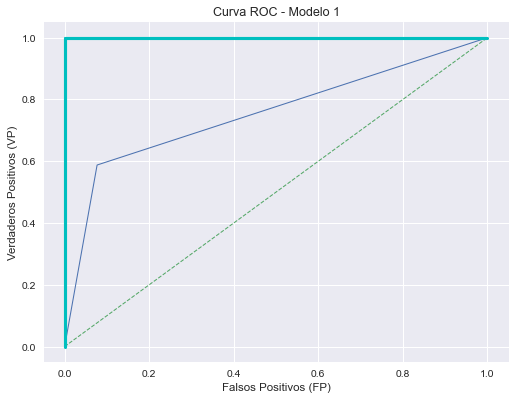

In [53]:
# Generación de curva roc
false_positive, true_positive, threshold = roc_curve(y_test, y_hat)

plt.title('Curva ROC - Modelo 1')
plt.plot(false_positive, true_positive, lw=1)
plt.plot([0, 1], ls="--", lw=1)
plt.plot([0, 0], [1, 0] , c='c', lw=3), plt.plot([1, 1], c='c', lw=3)
plt.ylabel('Verdaderos Positivos (VP)')
plt.xlabel('Falsos Positivos (FP)')

#### Analisis de resultados Modelo 1:

- El f1-score indica que este modelo predice una certeza aleatoria, esto debido a que para ambos casos el f1-score es mayor a 50% (90% para 0, y 64% para 1).
- La métrica de precision, nos indica que el modelo muestra de buena forma los sueldos sobre 50k, donde supera el 71% para ambas clases.
- Recall tiene una gran certeza en predecir sueldos menores o iguales a 50k con un porcentaje superior a 90%, y no es tan efectivo con los mayores a 50k (59%).
- La curva ROC nos indica que la detección de VP es superior a la de FP, esto se aprecia como una "curva" sobre la bisectriz.

#### Modelo 2
Se realizará un modelo con interacciones entre variables

In [54]:
# visualizamos coeficientes de las variables usando el coeficiente de la funcion anterior 
pd.DataFrame(data={
    'variable': df.drop('income', axis=1).columns,
    'coeficiente': modelo_1.coef_[0]})

,variable,coeficiente
0,age,0.361825
1,fnlwgt,0.070075
2,educational_num,0.764672
3,capital_gain,2.376179
4,capital_loss,0.281901
5,hours_per_week,0.372626
6,workclass_recod_private,-0.187320
7,workclass_recod_self_employed,-0.267909
8,workclass_recod_state_level_gov,-0.156790
9,civstatus_married,0.329413


<AxesSubplot:>

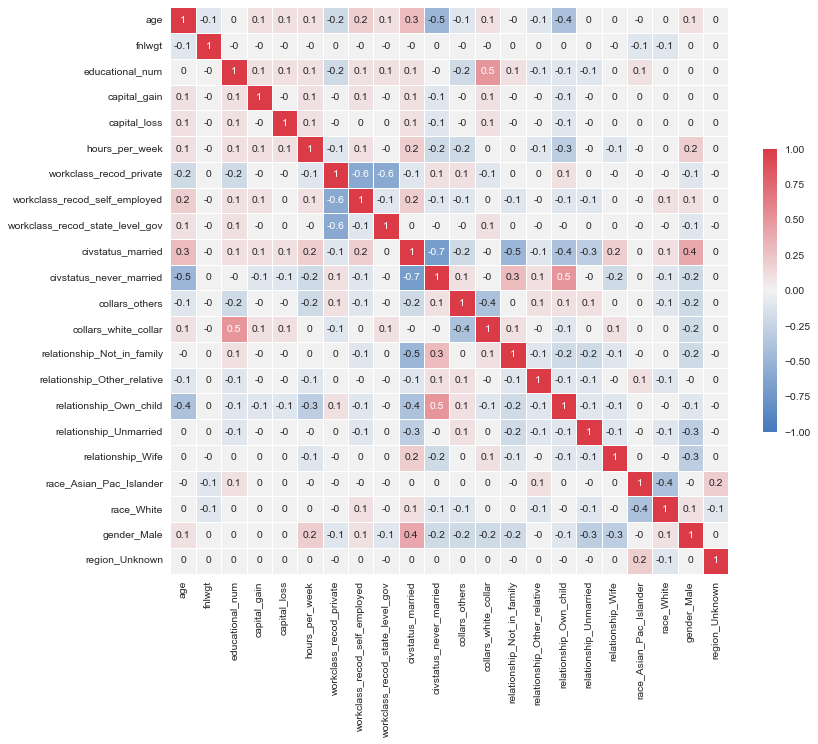

In [55]:
# Se realiza un analisis de correlaciones 
f, ax = plt.subplots(figsize=(12, 10)) # Tamaño
sns.heatmap(round(df.drop('income', axis=1).corr(), 1), annot=True, cmap=cmap, vmin=-1, vmax=1,
linewidths=.5, cbar_kws={"shrink": .5})

#### Pre analisis con los coeficientes de las variables y el heatmap:
Trataremos de buscar existe un complemento entre las variables que mejore las predicciones.

- <code>relationship_Own_chil y age </code>varían en dirección contraria con una correlación de -0.4. Asi que generaremos una interacción entre ellas
- <code>civstatus_never_married y age </code> varían en dirección contraria con una correlación de -0.5. Por su fuerte correlación negativa, generaremos una interacción entre ellas. 


In [56]:
# Se copia el dataframe y se analizan las interacciones
df2 = df.copy()
df2['inter_age_never_married'] = df['age'] * df['civstatus_never_married']
df2['inter_age_own_child'] = df['age'] * df['relationship_Own_child']

# Utilización predict() para predicción 2
modelo_2, y_test2, y_hat2 = fun.predict_(df2, var_obj='income')
print(classification_report(y_test2, y_hat2))

              precision    recall  f1-score   support

           0       0.87      0.92      0.90     11487
           1       0.71      0.58      0.64      3704

    accuracy                           0.84     15191
   macro avg       0.79      0.75      0.77     15191
weighted avg       0.83      0.84      0.84     15191



Text(0.5, 0, 'Falsos Positivos (FP)')

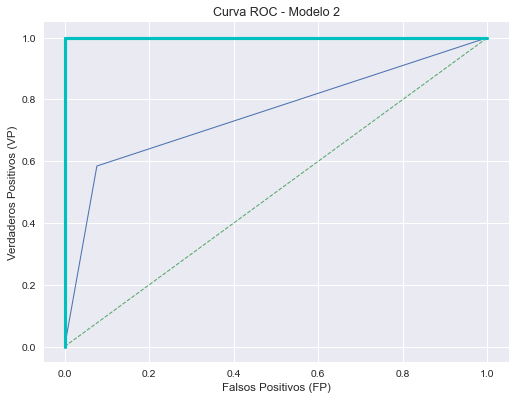

In [57]:
# Generación de curva roc
false_positive, true_positive, threshold = roc_curve(y_test2, y_hat2)

plt.title('Curva ROC - Modelo 2')
plt.plot(false_positive, true_positive, lw=1)
plt.plot([0, 1], ls="--", lw=1)
plt.plot([0, 0], [1, 0] , c='c', lw=3), plt.plot([1, 1], c='c', lw=3)
plt.ylabel('Verdaderos Positivos (VP)')
plt.xlabel('Falsos Positivos (FP)')

#### Analisis de resultados Modelo 2:

- Al comparar al modelo1 con los resultados del modelo2, se concluye que la interación testeada <code>no otorgó una mejor predicción</code>.
- el Recall bajo un poco su efectividad con los sueldos mayores a 50k (58%).
- La curva ROC se mantiene.


#### Modelo 3
Se realizará un modelo analizando la variable edad (<code>age</code>) asumiendo que en los tramos mayores de la edad deberia bajar el sueldo se probara la interacción con ella misma o cuadrática, tambien se testeara la interaccion de la variable <code>hours_per_week</code> con <code>workclass_recod_self_employed </code>debido a su fuerte correlación negativa (-0.6)

In [58]:
# Se copia el dataframe y se analizan las interacciones
df3 = df.copy()
df3['age_2'] = df['age'] ** 2
df3['inter_hours_self_employed'] = df['hours_per_week'] * df['workclass_recod_self_employed']

# Utilización predict() para predicción 3
modelo_3, y_test3, y_hat3 = fun.predict_(df3, var_obj='income')
print(classification_report(y_test3, y_hat3))

              precision    recall  f1-score   support

           0       0.88      0.92      0.90     11487
           1       0.71      0.60      0.65      3704

    accuracy                           0.84     15191
   macro avg       0.80      0.76      0.78     15191
weighted avg       0.84      0.84      0.84     15191



Text(0.5, 0, 'Falsos Positivos (FP)')

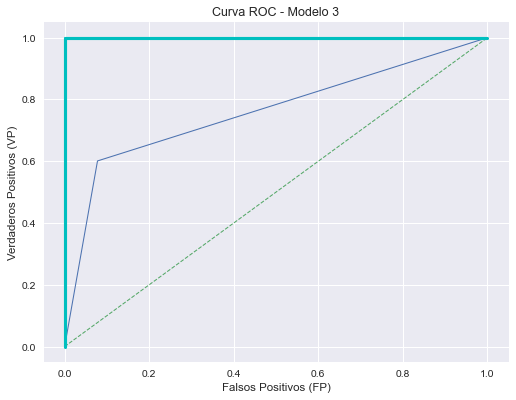

In [59]:
# Generación de curva roc
false_positive, true_positive, threshold = roc_curve(y_test3, y_hat3)

plt.title('Curva ROC - Modelo 3')
plt.plot(false_positive, true_positive, lw=1)
plt.plot([0, 1], ls="--", lw=1)
plt.plot([0, 0], [1, 0] , c='c', lw=3), plt.plot([1, 1], c='c', lw=3)
plt.ylabel('Verdaderos Positivos (VP)')
plt.xlabel('Falsos Positivos (FP)')

In [60]:
# visualizamos coeficientes de las variables
pd.DataFrame(data={
    'variable': df3.drop('income', axis=1).columns,
    'coeficiente': modelo_3.coef_[0]}).sort_values(by='coeficiente',ascending=False)

,variable,coeficiente
0,age,2.877842
3,capital_gain,2.423328
2,educational_num,0.732513
20,gender_Male,0.391176
5,hours_per_week,0.387670
9,civstatus_married,0.348198
12,collars_white_collar,0.327809
4,capital_loss,0.283183
17,relationship_Wife,0.226657
19,race_White,0.123125


#### Analisis de resultados Modelo 3:

Interaccion de variables

- <code>age, capital_gain, educational_num, hours_per_week, collars_white_collar</code>: Son los atributos que muestran mayor fortaleza para interactuar positivamente hacia un ingreso anual sobre 50K

- <code>relationship_Own_child, relationship_Not_in_family, relationship_Unmarried</code>: Son principalmente los atributos que muestran aporte negativo sobre el ingreso anual

Analisis del modelo

- El f1-score de este modelo logra aumentar en un punto porcentual su certeza en las predicciones sobre el modelo 1, llegando a 65%.
    - Obtiene un 60% en los VP. (Recall).
    - Precision y Accuracy se mantienen constantes.
    
- La curva ROC ratifica la significancia del modelo, ya que indica que la detección de VP es superior a la de FP.

### Conclución Final

El <code>Modelo3</code> es el que predice de mejor manera la VO income, entregando una mayor certeza en sus predicciones.